# Data Analyst Portfolio Project

### [BONUS] WEB Scrapping (BeautifulSoup)

Scrapping The first page of the search result from programming job search on indeed website

In [4]:
# Import Libraries
import requests
from bs4 import BeautifulSoup
# Getting Requests
URL = 'https://ng.indeed.com/Software-Developer-jobs?vjk=72949a771a0f0ddc'
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

In [33]:
results = soup.find(id="mosaic-zone-jobcards")
job_elements = results.find_all("div", class_="slider_container css-11g4k3a eu4oa1w0")


In [38]:
#Filtering out the job details from the websites

title_list = []
company_list =[]
location_list = []
description_list = []

for job in job_elements:
    title = job.find("h2", class_="jobTitle").text
    company = job.find("span", class_="companyName").text
    location = job.find("div", class_="companyLocation").text
    description = job.find("div", class_="job-snippet").text

    title_list.append(title)
    company_list.append(company)
    location_list.append(location)
    description_list.append(description)



In [48]:
# Converting The data,s into a dataframe
import pandas as pd

job_df = pd.DataFrame(list(zip(title_list,company_list,location_list,description_list)), index = range(len(title_list)), columns=['Title','Company Name','Location','Job Description'])


# PERFORMING EDA ON HOTEL BOOKING DATA 

* The data hotel booking data was download from kaggle (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?resource=download) 
* Data description -> This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.
* The dataset contains 32 columns which include arrival date, time spent, hotel names and other tangible information about the hotel

### Objectives
* EDA(Exploratory Data Analysis)
* Visualization
* Hypothesis testing
* Summary and Report


In [50]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# Importing Data
hotel_booking= pd.read_csv('hotel_bookings.csv')


In [62]:
print(hotel_booking.shape)

(119390, 32)


* The Dataset consist of 119390 rows and 32 Columns

In [67]:
print(hotel_booking.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [71]:
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [96]:
hotel_booking.head()
hotel_booking.hotel.value_counts()

AttributeError: 'Series' object has no attribute 'hotel'

In [80]:
agents = pd.isnull(hotel_booking.agent)
(hotel_booking[agents])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [104]:
hotel_booking.arrival_date_month.unique()
month = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
    
}
hotel_booking.arrival_date_month = hotel_booking.arrival_date_month.replace(month)
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [155]:
hotel_booking.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

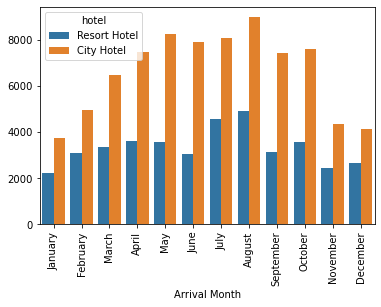

In [156]:
ax = sns.barplot(x=hotel_booking.arrival_date_month,y=range(len(hotel_booking)),hue= hotel_booking.hotel,estimator=np.count_nonzero)
ax.set_xticks(range(12))
ax.set_xticklabels(month)
plt.xticks(rotation='vertical')
plt.xlabel('Arrival Month')
                
plt.show()

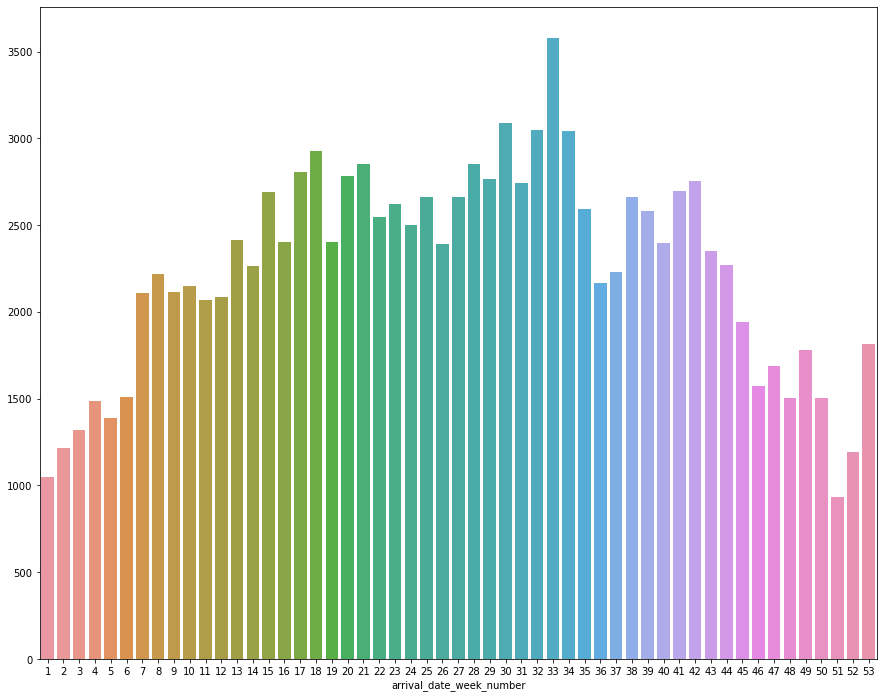

In [166]:
plt.figure(figsize=(15,12))
sns.barplot(x=hotel_booking.arrival_date_week_number, y= range(len(hotel_booking)), estimator=np.count_nonzero)
plt.show()

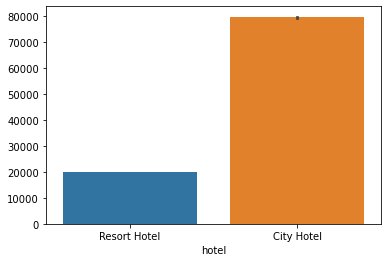

In [111]:
sns.barplot(x=hotel_booking.hotel,y=range(len(hotel_booking)))
plt.show()

## Visualization Report

* dtypes: float64(4), int64(16), object(12)
* From the dataset it was deduce that about 60%(79330) of the data fall in the  city hotel while about 30%(40060) falls in the Resort Hotel
* Despite that a larged amount of NULL value were present in the agent and company column we can still ignore them since they are of no significant importance to our analysis
* With the low number of hotel visit in the month of December, Yet on the weekly scale there seems to be a high turnout in the hotel during the last week of the years ...... It could be assume that there are higher visits to the hotel during the Festive periods
* And its really obvious that there are more vists to the Hotels during summer Holidays(June July August)

## Hypothesis 
* Are there possibilities that some hotels are preferable to the other depending on the particular time of the month ?

* NUll hypothesis : There's no relationship between the type of Hotel and the Month of visit
* Alternative Hypothesis : The Visit to the Hotel increases base on the month

* since its the correlation between two categorical variables we will Run Chi Square test using a pvalue of 0.05

In [159]:
#Import Chi2 contigency package
from scipy.stats import chi2_contingency

# First create a contingency table

table = pd.crosstab(hotel_booking.hotel,hotel_booking.arrival_date_month)
table

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
hotel,,,,,,,,,,,,
City Hotel,3736,4965,6458,7480,8232,7894,8088,8983,7400,7605,4357,4132
Resort Hotel,2193,3103,3336,3609,3559,3045,4573,4894,3108,3555,2437,2648


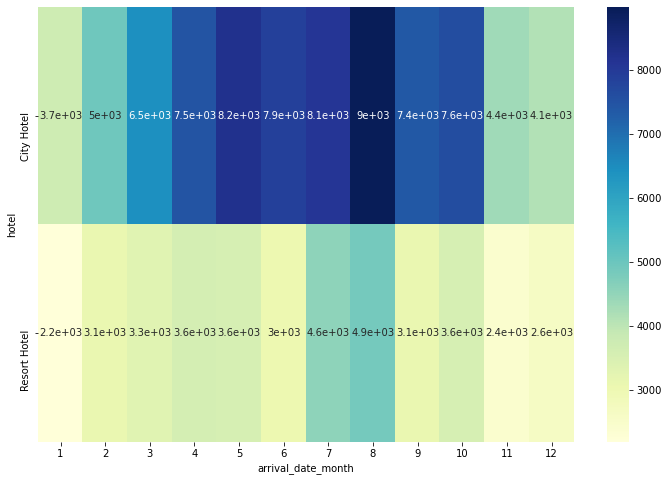

In [161]:
plt.figure(figsize=(12,8))
sns.heatmap(table, annot=True, cmap="YlGnBu")
plt.show()

In [164]:
c, pvalue, dof, expected = chi2_contingency(table)

3.5175313992493783e-119

#### Hypothesis Report
* Given a Pvalue of 3.517531399249378e-121 which is lower than the significance threshold implies that the probability of the relationship betwen the type of hotel and the month being random is very low
* Therefore the Null Hypothesis which stated that there's no significant relationship between the two variables can be rejected